## Predictive Modeling : FSTE 100 & FTSE 250 

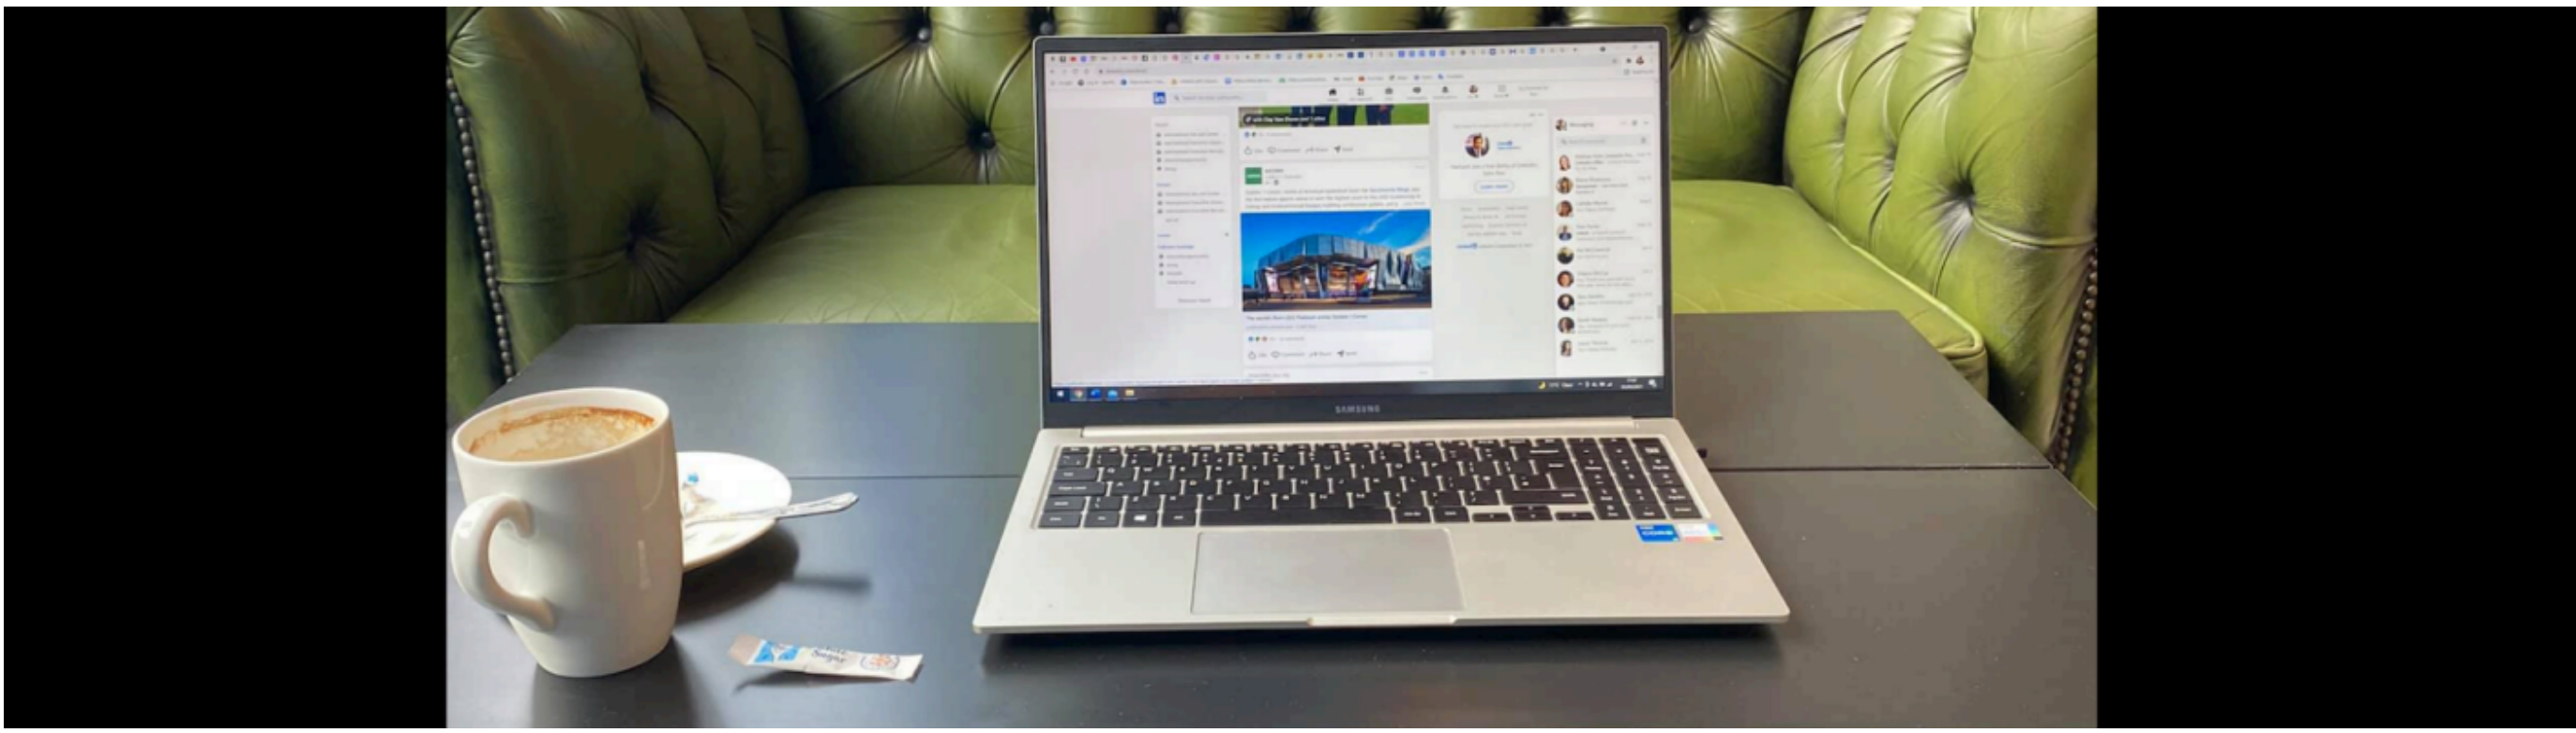~

### Hemant Thapa 

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def stock(ticker):
    return yf.download(ticker, period='1Y')

In [4]:
ftse250 = stock("^FTMC")
ftse100 = stock("^FTSE")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
def rsi(data, window=14):
    # daily price changes
    delta = data['Close'].diff()
    # gains and losses
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    # average gains and losses over the specified window
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    # relative strength (RS)
    rs = avg_gain / avg_loss
    # RSI
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [6]:
ftse250['RSI'] = rsi(ftse250)
ftse100['RSI'] = rsi(ftse100)

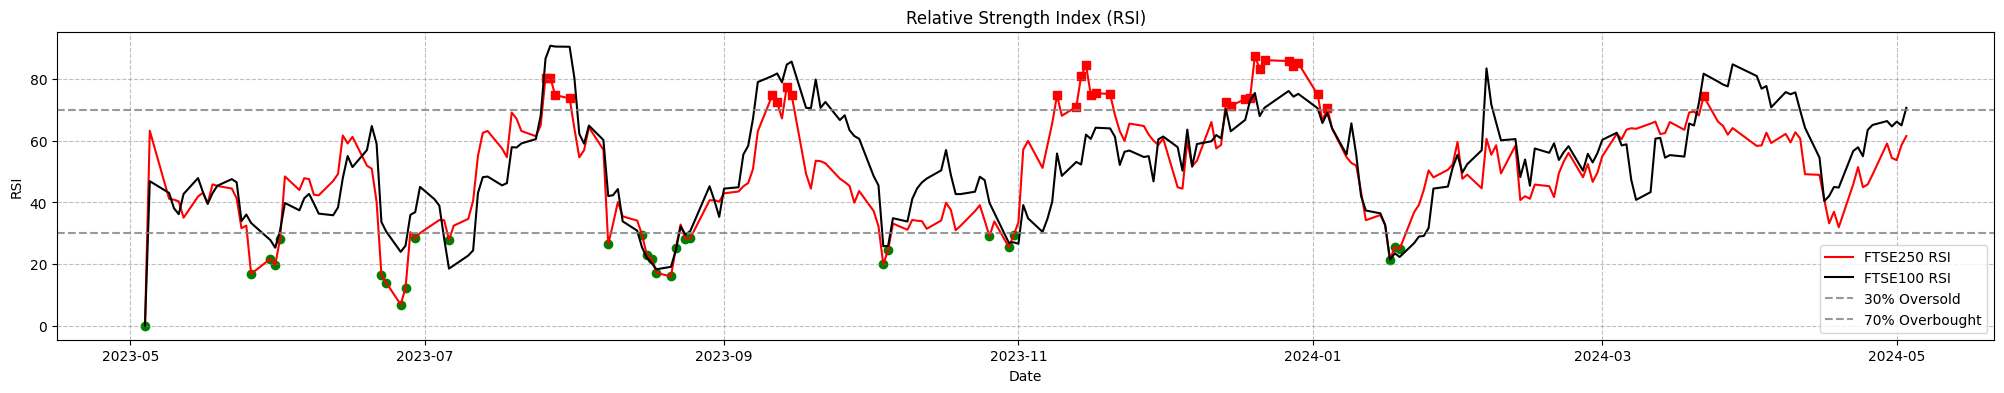

In [7]:
plt.figure(figsize=(25, 4))
plt.plot(ftse250.index, ftse250['RSI'], label='FTSE250 RSI', color='red')
plt.plot(ftse100.index, ftse100['RSI'], label='FTSE100 RSI', color='black')
# overbought and oversold regions
oversold_marker = 'o'
overbought_marker = 's'
for index, rsi_value in ftse250['RSI'].items():
    if rsi_value <= 30:
        plt.scatter(index, rsi_value, color='green', marker=oversold_marker)
    elif rsi_value >= 70:
        plt.scatter(index, rsi_value, color='red', marker=overbought_marker)
plt.axhline(y=30, color='grey', linestyle='--', label='30% Oversold', alpha=0.8)
plt.axhline(y=70, color='grey', linestyle='--', label='70% Overbought', alpha=0.8)
plt.title('Relative Strength Index (RSI)')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [8]:
def ema(data, window=20):
    return data.ewm(span=window, min_periods=0, adjust=False).mean()

def sma(data, window=20):
    return data.rolling(window=window, min_periods=0).mean()

In [9]:
# EMA and SMA for FTSE100 and FTSE250
ftse100['RSI_EMA_20'] = ema(ftse100['RSI'], window=20)
ftse100['RSI_EMA_80'] = ema(ftse100['RSI'], window=80)
ftse100['RSI_SMA_20'] = sma(ftse100['RSI'], window=20)
ftse100['RSI_SMA_80'] = sma(ftse100['RSI'], window=80)

ftse250['RSI_EMA_20'] = ema(ftse250['RSI'], window=20)
ftse250['RSI_EMA_80'] = ema(ftse250['RSI'], window=80)
ftse250['RSI_SMA_20'] = sma(ftse250['RSI'], window=20)
ftse250['RSI_SMA_80'] = sma(ftse250['RSI'], window=80)

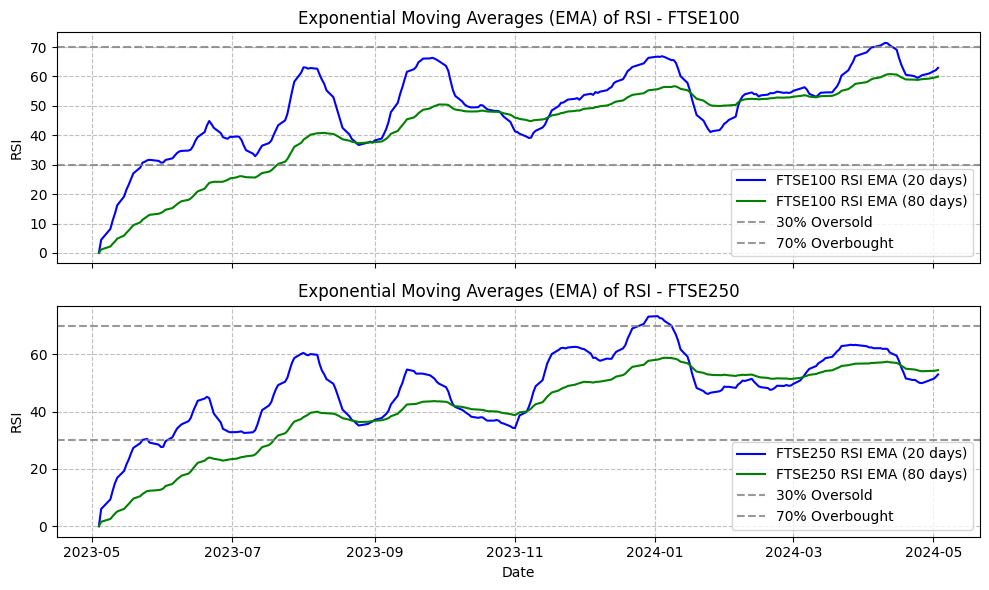

In [10]:
# EMA for FTSE100 and FTSE250
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax1.plot(ftse100.index, ftse100['RSI_EMA_20'], label='FTSE100 RSI EMA (20 days)', color='blue')
ax1.plot(ftse100.index, ftse100['RSI_EMA_80'], label='FTSE100 RSI EMA (80 days)', color='green')
ax1.axhline(y=30, color='grey', linestyle='--', label='30% Oversold', alpha=0.8)
ax1.axhline(y=70, color='grey', linestyle='--', label='70% Overbought', alpha=0.8)
ax1.set_title('Exponential Moving Averages (EMA) of RSI - FTSE100')
ax1.grid(True, ls='--', alpha=0.5, color='grey')
ax1.set_ylabel('RSI')
ax1.legend()

ax2.plot(ftse250.index, ftse250['RSI_EMA_20'], label='FTSE250 RSI EMA (20 days)', color='blue')
ax2.plot(ftse250.index, ftse250['RSI_EMA_80'], label='FTSE250 RSI EMA (80 days)', color='green')
ax2.axhline(y=30, color='grey', linestyle='--', label='30% Oversold', alpha=0.8)
ax2.axhline(y=70, color='grey', linestyle='--', label='70% Overbought', alpha=0.8)
ax2.set_title('Exponential Moving Averages (EMA) of RSI - FTSE250')
ax2.grid(True, ls='--', alpha=0.5, color='grey')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()
plt.tight_layout()
plt.show()

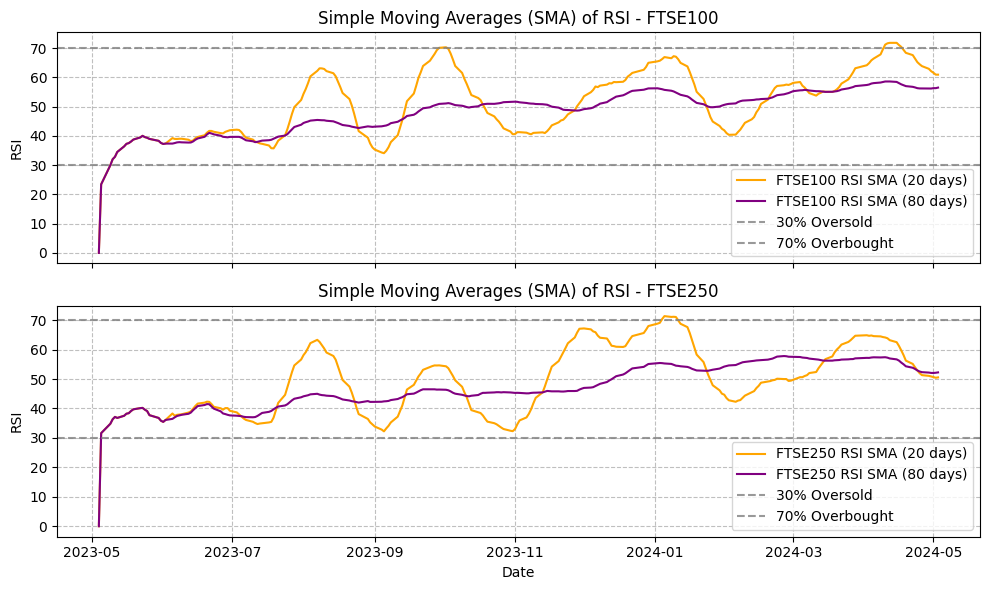

In [11]:
# SMA for FTSE100 and FTSE250
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax1.plot(ftse100.index, ftse100['RSI_SMA_20'], label='FTSE100 RSI SMA (20 days)', color='orange')
ax1.plot(ftse100.index, ftse100['RSI_SMA_80'], label='FTSE100 RSI SMA (80 days)', color='purple')
ax1.axhline(y=30, color='grey', linestyle='--', label='30% Oversold', alpha=0.8)
ax1.axhline(y=70, color='grey', linestyle='--', label='70% Overbought', alpha=0.8)
ax1.set_title('Simple Moving Averages (SMA) of RSI - FTSE100')
ax1.grid(True, ls='--', alpha=0.5, color='grey')
ax1.set_ylabel('RSI')
ax1.legend()

ax2.plot(ftse250.index, ftse250['RSI_SMA_20'], label='FTSE250 RSI SMA (20 days)', color='orange')
ax2.plot(ftse250.index, ftse250['RSI_SMA_80'], label='FTSE250 RSI SMA (80 days)', color='purple')
ax2.axhline(y=30, color='grey', linestyle='--', label='30% Oversold', alpha=0.8)
ax2.axhline(y=70, color='grey', linestyle='--', label='70% Overbought', alpha=0.8)
ax2.set_title('Simple Moving Averages (SMA) of RSI - FTSE250')
ax2.grid(True, ls='--', alpha=0.5, color='grey')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()
plt.tight_layout()
plt.show()

#### Feature Engineering 

In [12]:
X = ftse250['Adj Close'].values.reshape(-1, 1)
y = ftse100['Adj Close'].values

In [13]:
# X and y have the same length
X = X[:len(y)]
y = y[:len(X)]

In [14]:
X.shape, y.shape

((255, 1), (255,))

In [15]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# polynomial features
poly_features = PolynomialFeatures(degree=5)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [17]:
# linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

#### Model Evaluation 

In [18]:
from tabulate import tabulate

In [19]:
# Make predictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

In [20]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train RMSE: 84.70955675387545
Test RMSE: 92.35551664783225
Train R^2 Score: 0.7976847510256422
Test R^2 Score: 0.7066995917038338


#### Best Fit Line 

In [21]:
sorted_indices = np.argsort(X.ravel())  
sorted_X = X.ravel()[sorted_indices]  
sorted_predictions = model.predict(poly_features.transform(X))[sorted_indices]  

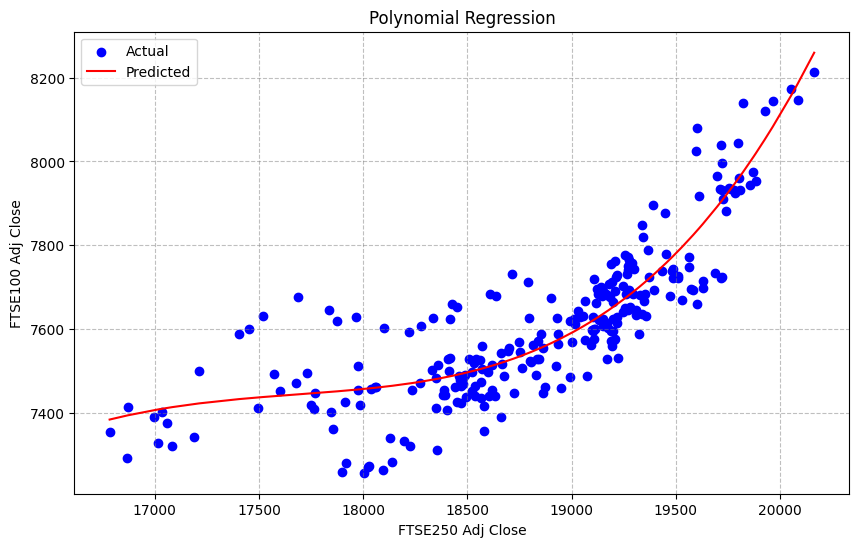

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(sorted_X, sorted_predictions, color='red', label='Predicted')  # Plot sorted predictions
plt.title('Polynomial Regression')
plt.xlabel('FTSE250 Adj Close')
plt.ylabel('FTSE100 Adj Close')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

#### Residual Analysis 

In [23]:
from scipy import stats

In [24]:
# residuals
residuals = y - model.predict(poly_features.transform(X))

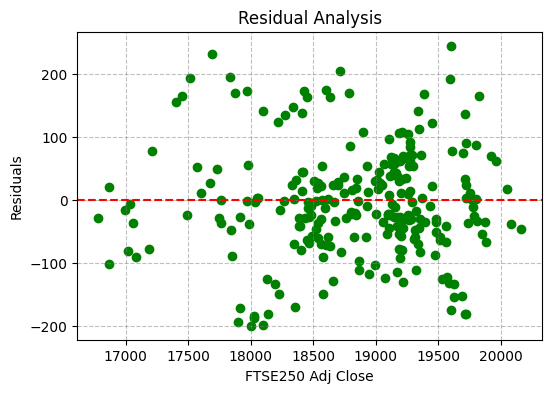

In [25]:
plt.figure(figsize=(6, 4))
plt.scatter(X, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  
plt.title('Residual Analysis')
plt.xlabel('FTSE250 Adj Close')
plt.ylabel('Residuals')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

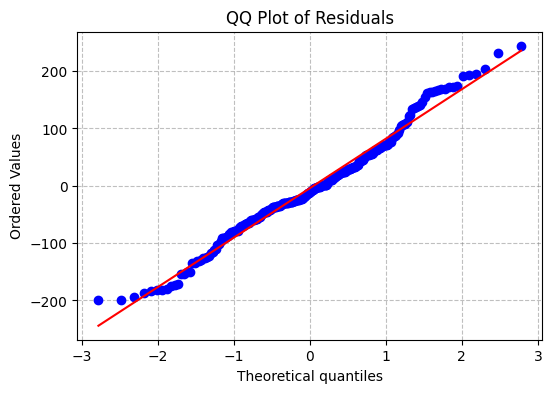

In [26]:
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()